Unfortunately there seems to be some incompatibility between Mantid and SpinW, so they cannot be loaded together.

So we have to load the data from Mantid in a separate notebook and then save it as a numpy file which will be loaded in the SpinW notebook

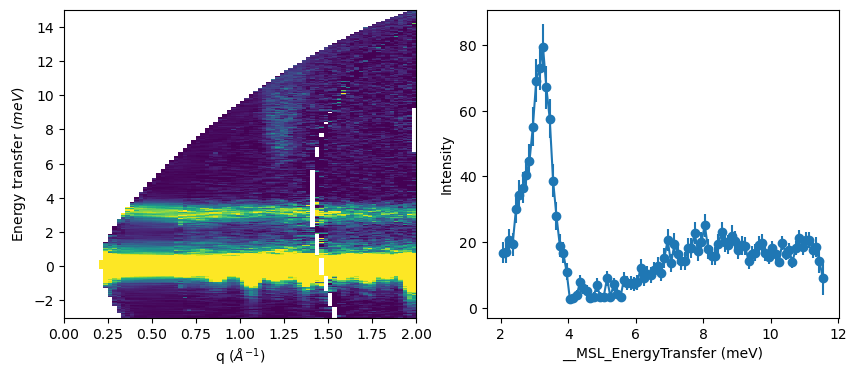

In [1]:
import mantid.simpleapi
import mslice.cli as mc
import mslice.plotting.pyplot as mplt
import matplotlib.pyplot as plt
import numpy as np

import os
data_folder = os.path.join(os.getcwd(), '..', 'datafiles')
# You may need to rename this to some actual directory where the data are.
# The above code assumes you downloaded the zip of the course materials and did not change the path of this notebook.
#data_folder = r'c:\some\path\to\the\datafiles'

# Loads the data and make a 2D slice
ws_bi4fe5o13f_Ei16meV = mc.Load(Filename=f'{data_folder}/bi4fe5o13f_Ei16meV.nxspe', OutputWorkspace='bi4fe5o13f_Ei16meV')
slice_ws = mc.Slice(ws_bi4fe5o13f_Ei16meV, Axis1="|Q|, 0, 2, 0.025", Axis2="DeltaE,-3, 15, 0.05", NormToOne=False)
cut_ws = mc.Cut(ws_bi4fe5o13f_Ei16meV, CutAxis="DeltaE,2.0,12.0,0.1", IntegrationAxis="|Q|,1.1,1.3,0.0")

fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'mantid'}, figsize=(10, 4))
ax[0].pcolormesh(mc.Transpose(slice_ws).raw_ws, cmap='viridis', vmax=100)
ax[1].errorbar(cut_ws.raw_ws, label="bi4fe5o13f_Ei16meV 1.10<|Q|<1.30", color="#1f77b4", marker="o", ls="-", lw=1.5)

# Extract the data
cut_en = cut_ws.get_coordinates()
cut_en = cut_en[list(cut_en.keys())[0]]
cut_i = cut_ws.get_signal()
cut_e = cut_ws.get_error()
slice_coords = slice_ws.get_coordinates()
slice_q = slice_coords['q']
slice_e = slice_coords['Energy transfer']
slice_int = slice_ws.get_signal()

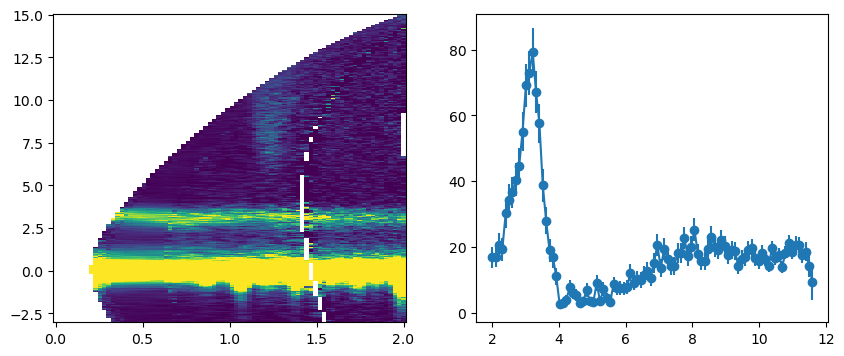

In [2]:
# Checks the extracted data is ok and then saves it

fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'mantid'}, figsize=(10, 4))
ax[0].pcolormesh(slice_q, slice_e, slice_int.T, cmap='viridis', vmax=100)
ax[1].errorbar(cut_en, cut_i, cut_e, label="bi4fe5o13f_Ei16meV 1.10<|Q|<1.30", color="#1f77b4", marker="o", ls="-", lw=1.5)

np.save('bfof_data.npy', {'cut_en':cut_en, 'cut_i':cut_i, 'cut_e':cut_e, 
                          'slice_q':slice_q, 'slice_e':slice_e, 'slice_int':slice_int})